In [35]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [125]:
top = Table.read_table('top_movies.csv')
top.set_format([2, 3], NumberFormatter).show(30)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
Avatar,Fox,"760,507,625","846,120,800",2009
Titanic,Paramount,"658,672,302","1,178,627,900",1997
Jurassic World,Universal,"652,270,625","687,728,000",2015
Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
Star Wars,Fox,"460,998,007","1,549,640,500",1977
Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


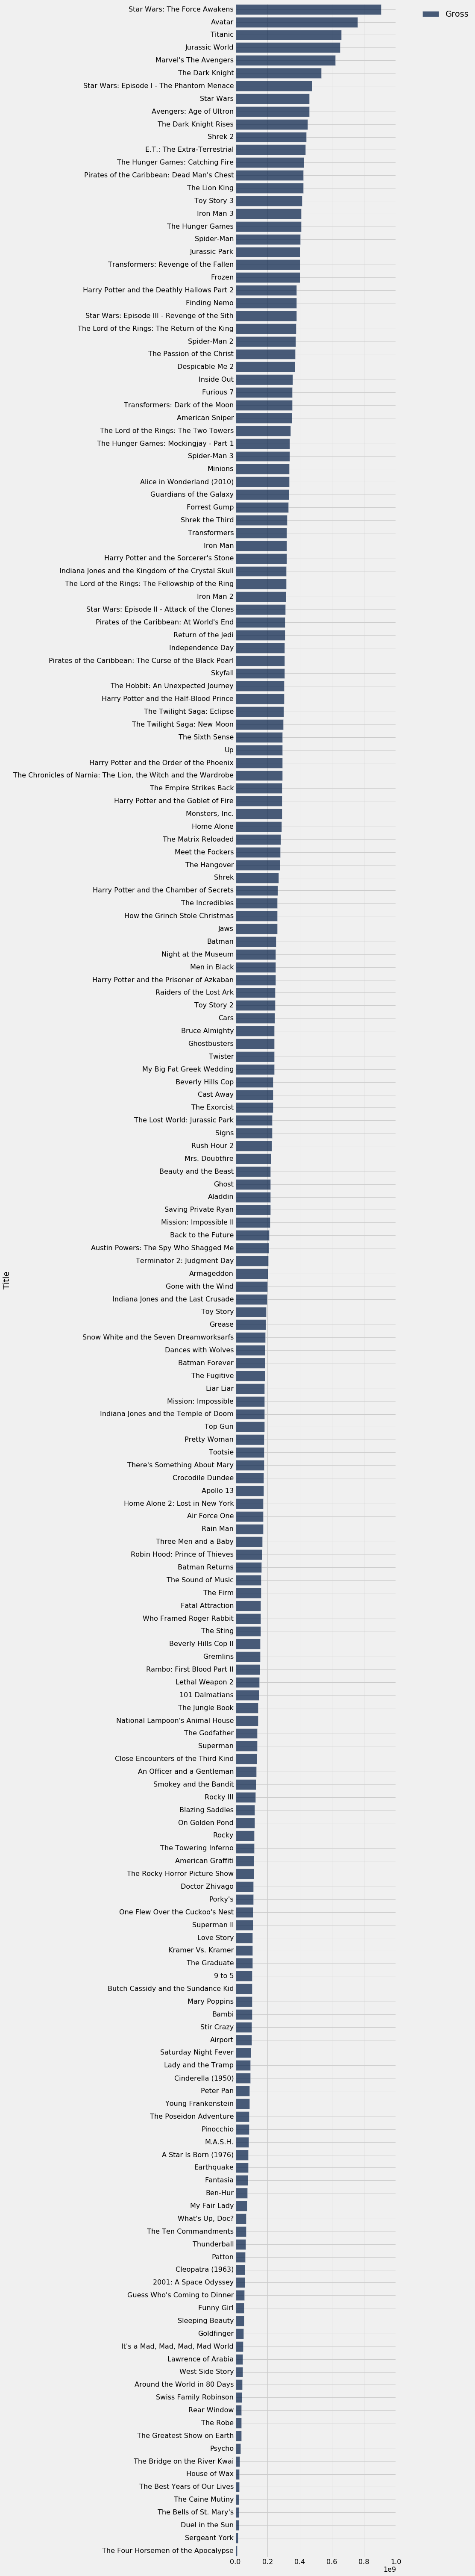

In [127]:
top.barh('Title', 'Gross')

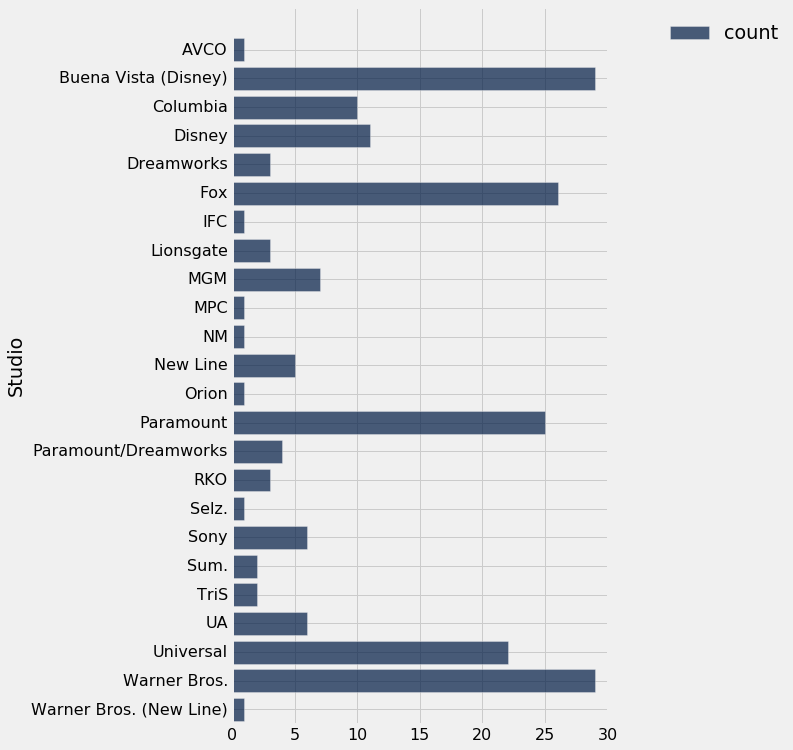

In [129]:
top.group('Studio').barh('Studio', 'count')

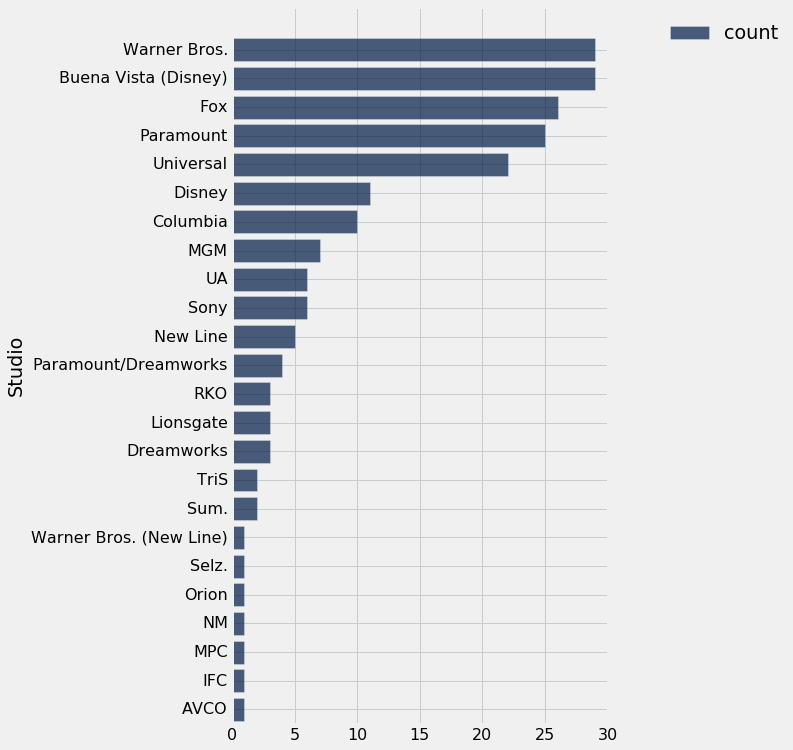

In [130]:
top.group('Studio').sort('count', descending=True).barh('Studio', 'count')

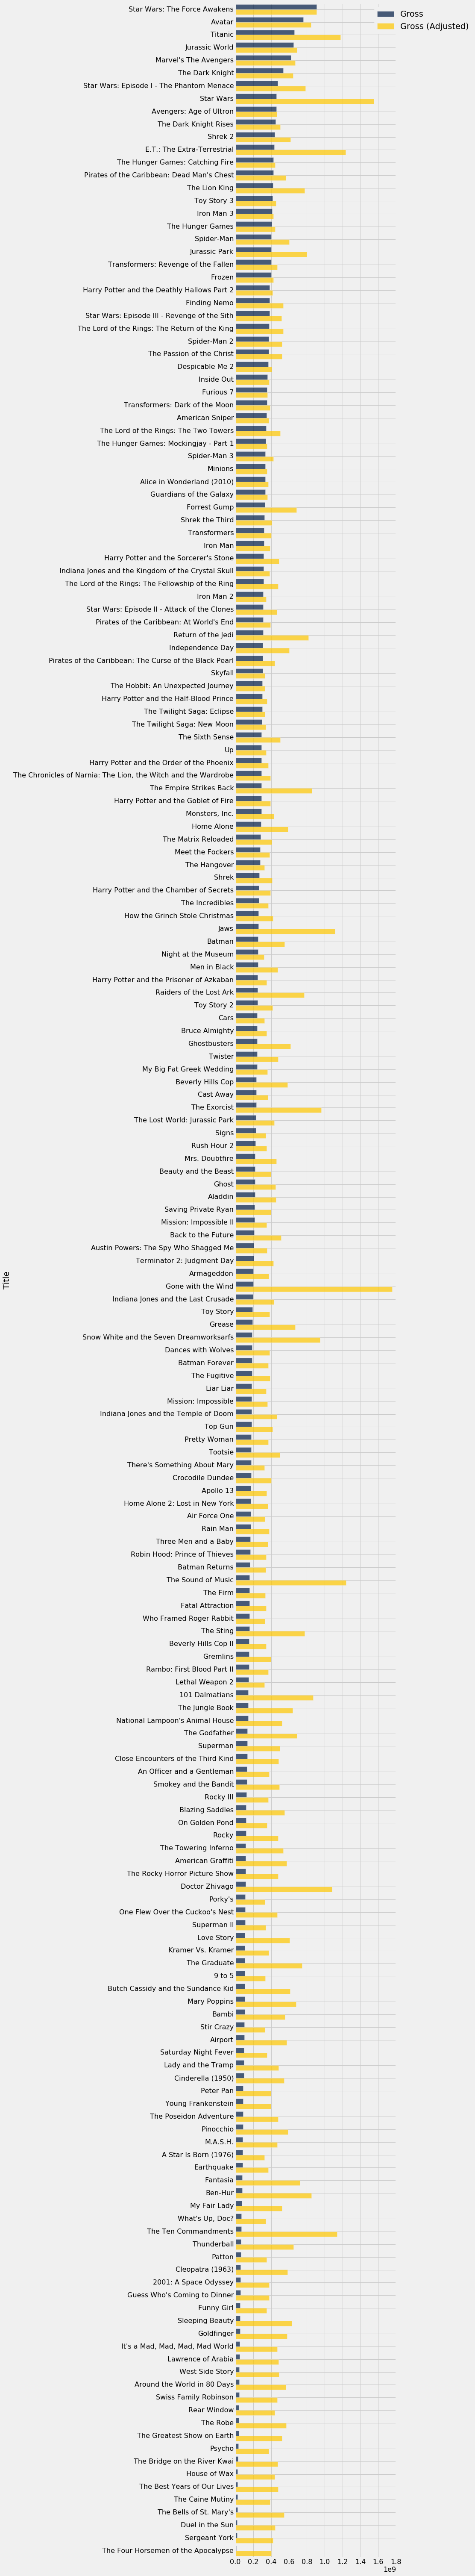

In [132]:
top.select([0, 2, 3]).barh('Title')

## Histograms

In [32]:
in_millions = np.round(top.column(3)/1000000, 2)
millions = top.select(['Title', 'Year']).with_column('Millions', in_millions)
millions

Title,Year,Millions
Star Wars: The Force Awakens,2015,906.72
Avatar,2009,846.12
Titanic,1997,1178.63
Jurassic World,2015,687.73
Marvel's The Avengers,2012,668.87
The Dark Knight,2008,647.76
Star Wars: Episode I - The Phantom Menace,1999,785.72
Star Wars,1977,1549.64
Avengers: Age of Ultron,2015,465.68
The Dark Knight Rises,2012,500.96


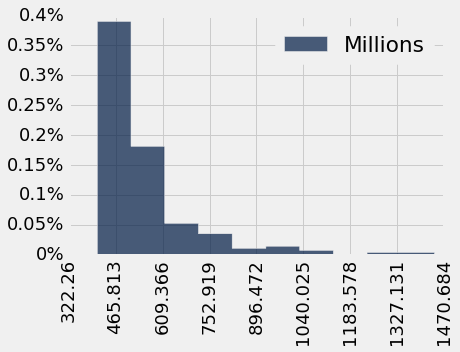

In [33]:
millions.hist('Millions')

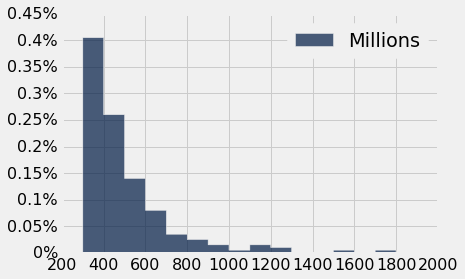

In [45]:
millions.hist('Millions', bins=np.arange(300,2001,100))

In [55]:
millions.bin('Millions', bins=np.arange(300,2001,100))

bin,Millions count
300,81
400,52
500,28
600,16
700,7
800,5
900,3
1000,1
1100,3
1200,2


In [81]:
PercentFormatter().format_value(81/millions.num_rows/(400-300))

'0.41%'

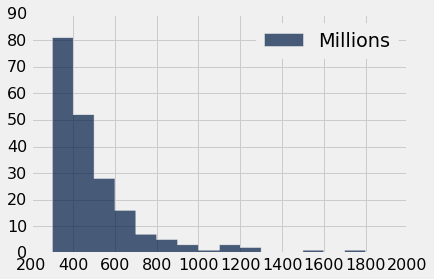

In [82]:
millions.hist('Millions', bins=np.arange(300,2001,100), normed=False)

In [90]:
millions.bin('Millions', bins=[300, 400, 500, 600, 700, 2000])

bin,Millions count
300,81
400,52
500,28
600,16
700,23
2000,0


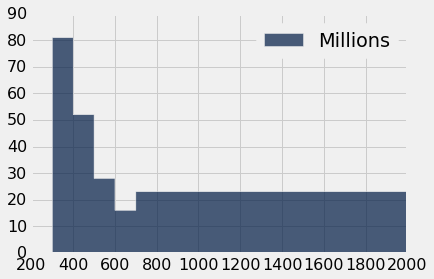

In [92]:
millions.hist('Millions', bins=[300, 400, 500, 600, 700, 2000], normed=False)

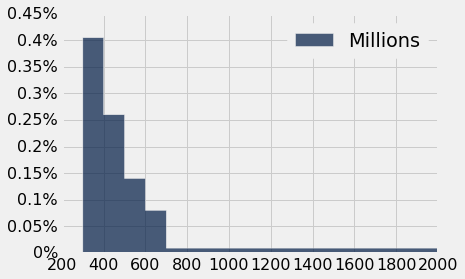

In [91]:
millions.hist('Millions', bins=[300, 400, 500, 600, 700, 2000])

In [104]:
trips = Table.read_table('trip.csv')
trips

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069
913452,293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),68,8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th),70,538,Subscriber,94118
913451,896,8/31/2015 23:07,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,363,Customer,92562
913450,255,8/31/2015 22:16,Embarcadero at Sansome,60,8/31/2015 22:20,Steuart at Market,74,470,Subscriber,94111
913449,126,8/31/2015 22:12,Beale at Market,56,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale),55,439,Subscriber,94130
913448,932,8/31/2015 21:57,Post at Kearny,47,8/31/2015 22:12,South Van Ness at Market,66,472,Subscriber,94702


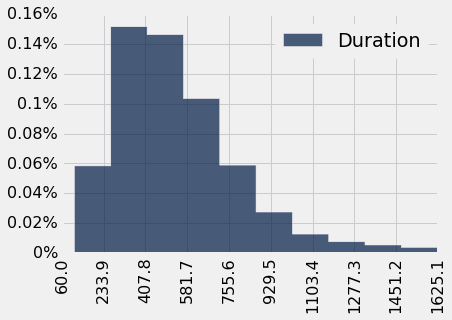

In [124]:
commute = trips.where(trips.column('Duration') < 1800)
commute.hist('Duration')

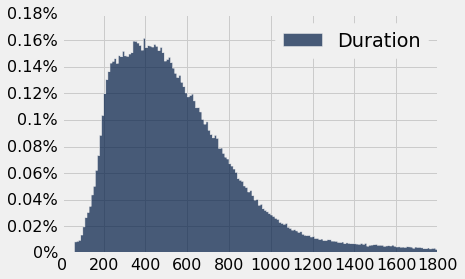

In [123]:
commute.hist('Duration', bins=np.arange(60, 1801, 10))